#**Tugas 03**
#Pemrosesan Citra Digital A


**Rahmaliyah Kadir - H071201093**

In [116]:
import cv2
import numpy as np
from numpy import *
import matplotlib.image as mping
import matplotlib.pylab as plt
from skimage.morphology import label, closing, square
from skimage.segmentation import clear_border
from skimage.color.colorconv import rgb2yiq

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1.Diberikan citra girl-warna.bmp, Tampilkan hasil transformasi citra tersebut ke model warna:
(tampilkan citra untuk masing-masing komponen)

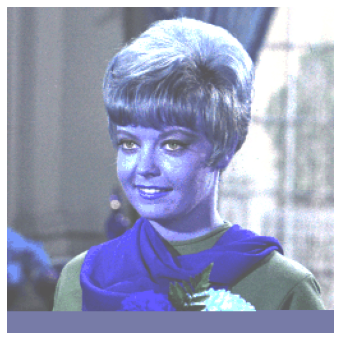

In [8]:
rach = cv2.imread('/content/drive/MyDrive/PCD/TGS_PCD_03/girl-warna.bmp')
plt.figure(figsize = (10,6))
plt.axis('off')
plt.imshow(rach)

#a. YCbCr

In [9]:
codes = [x for x in dir(cv2) if x.startswith("COLOR_")]
print(codes[:3])
print(codes)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA']
['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR

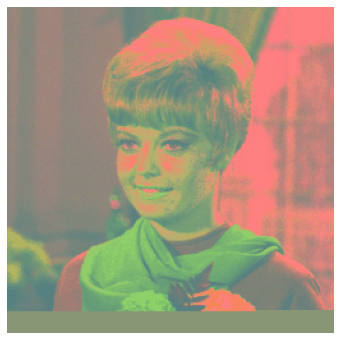

In [10]:
ycbcr = cv2.cvtColor(rach, cv2.COLOR_BGR2YCrCb)
cv2.imwrite("yuv.png", ycbcr)
plt.figure(figsize = (10,6))
plt.axis('off')
plt.imshow(ycbcr)

#b. HSI

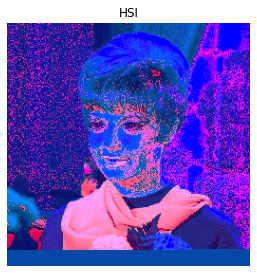

In [115]:
img_hsi = cv2.cvtColor(rach, cv2.COLOR_BGR2HSV_FULL)
plt.figure(figsize=(20, 6))
plt.subplot(142), plt.imshow(img_hsi,'gray'), plt.title('HSI')
# plt.tight_layout()
plt.axis('off')
plt.show()

#c. YIQ

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


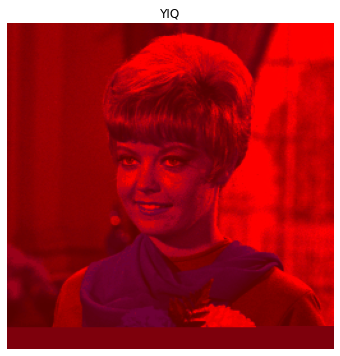

In [118]:
yiq = rgb2yiq(rach)
plt.figure(figsize=(15,6))
plt.imshow(yiq)
plt.axis('off')
plt.title('YIQ');

#d. YUV

In [ ]:
codes = [x for x in dir(cv2) if x.startswith("COLOR_")]
print(codes[:3])
print(codes)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA']
['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR

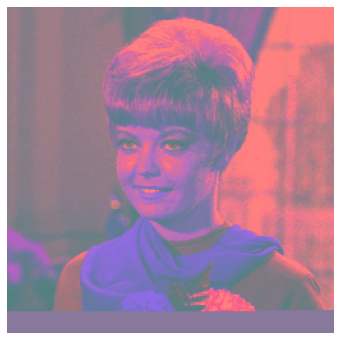

In [ ]:
yuv = cv2.cvtColor(rach, cv2.COLOR_BGR2YUV)
cv2.imwrite("yuv.png", yuv)
plt.figure(figsize = (10,6))
plt.axis('off')
plt.imshow(yuv)

#2. Tentukan nilai threshold dengan metode otsu dari citra montain.bmp dan tampilkan hasil threshold-nya.

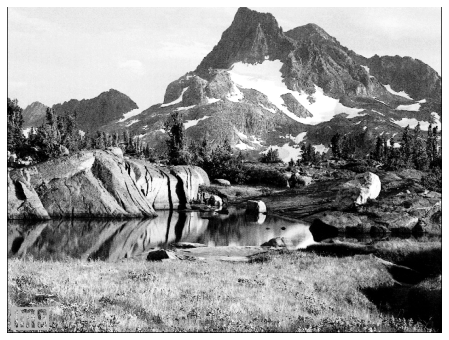

In [28]:
img = cv2.imread('/content/drive/MyDrive/PCD/TGS_PCD_03/mountain.bmp',0)
plt.figure(figsize = (10,6))
plt.axis('off')
plt.imshow(img,'gray')

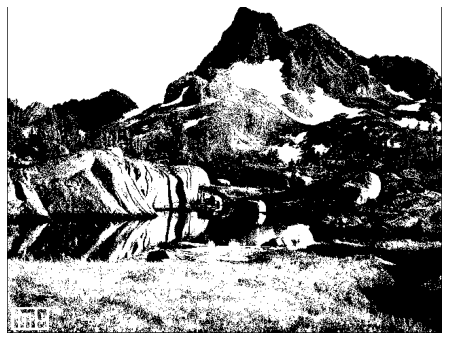

In [34]:
# Otsu
ret3,th3 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Plotting
plt.figure(figsize = (10,6))
plt.axis('off')
plt.imshow(th3,'gray')


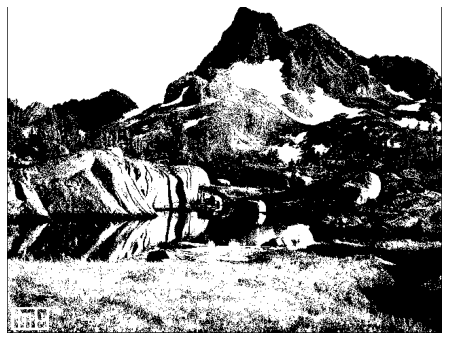

In [36]:
# Lakukan Thresholding
# Binary Threshold
ret,th1 = cv2.threshold(th3,127,255,cv2.THRESH_BINARY)
# Plotting
plt.figure(figsize = (10,6))
plt.axis('off')
plt.imshow(th1,'gray')

#3. Dengan menggunakan segmentasi dan proses citra biner, proses citra coints.png sehingga seluruh background menjadi hitam dan tidak terdapat bagian yang berlubang pada bagian koin dari citra tersebut.

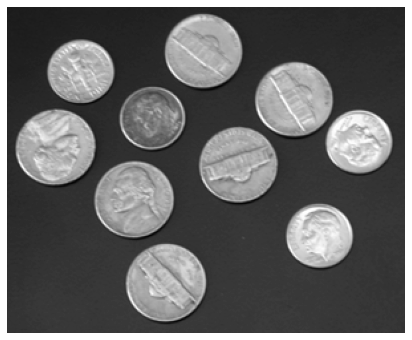

In [49]:
ama = cv2.imread('/content/drive/MyDrive/PCD/TGS_PCD_03/coints.png',0)
plt.figure(figsize = (10,6))
plt.axis('off')
plt.imshow(ama, cmap='gray')

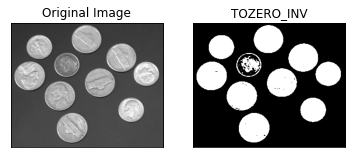

In [70]:
ret,thresh1 = cv2.threshold(ama,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(ama,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','TOZERO_INV']
images = [ama, thresh1, thresh2]
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

# ret,thresh = cv2.threshold(ama,127,255,cv2.THRESH_TOZERO_INV)
# # images = [ama, thresh]
# plt.title('TOZERO_INV')
# plt.axis('off')
# plt.xticks([]), plt.yticks([])
# plt.show(ret,thresh)

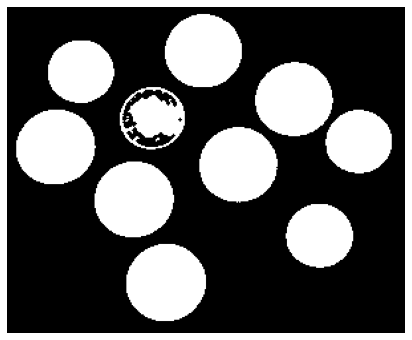

In [54]:
img_bin = clear_border(closing(ama > 120))
plt.figure(figsize = (10,6))
plt.axis('off')
plt.imshow(img_bin,'gray')

#4. Segmentasi citra peppers.tiff menggunakan K-Mean dengan nilai K = 3 berdasarkan warna.

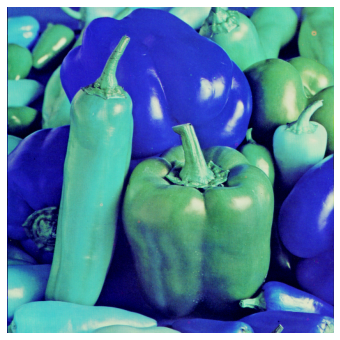

In [75]:
ramma = cv2.imread('/content/drive/MyDrive/PCD/TGS_PCD_03/peppers.tiff')
plt.figure(figsize = (10,6))
plt.axis('off')
plt.imshow(ramma, cmap = 'gray')

In [86]:
amma=cv2.cvtColor(ramma,cv2.COLOR_BGR2RGB)
vectorized = amma.reshape((-1,3))
vectorized = np.float32(vectorized)

In [87]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [96]:
K = 3
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [97]:
center = np.uint8(center)
res = center[label.flatten()]
result = res.reshape((amma.shape))

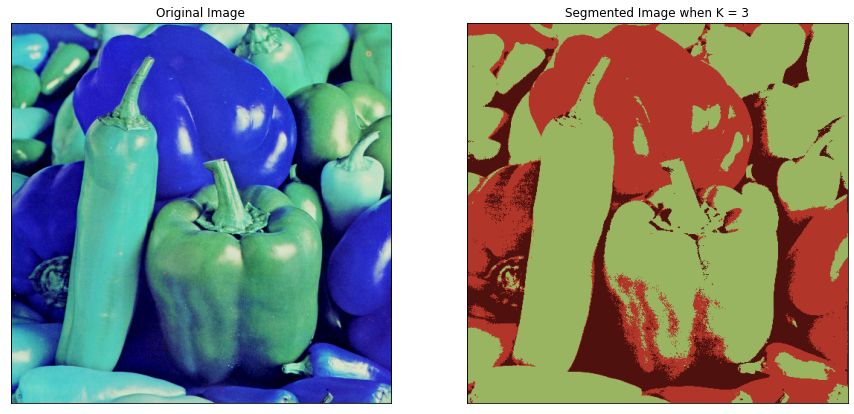

In [98]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(ramma, cmap="gray")
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result, cmap="gray")
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()